# Analyzing performance of Shape Predictor

In [2]:
from Landmarks_module import Landmarks
import matplotlib.pyplot as plt
import reorganize_coor
import numpy as np

In [3]:
# Import files
work_dir = '/Users/luciamf/Desktop/Landmarks_generator/example/data/work_data'
xml_file = '/Users/luciamf/Desktop/Landmarks_generator/example/all_data.xml'
dat = '/Users/luciamf/Desktop/Landmarks_generator/example/carabus.dat'

In [4]:
def plot_shape(shape1, shape2):
    i = 0
    for x,y in shape1:
        i+=1
        plt.scatter(x,y, color ='red', marker="$"+str(i)+"$")
    k = 0
    for x,y in shape2:
        k+=1
        plt.scatter(x+100,y, color = 'blue', marker="$"+str(k)+"$")


In [5]:
def get_xy(landmarks):
    x_list = []
    y_list = []
    for shape in landmarks:
        for x,y in shape:
            x_list.append(x)
            y_list.append(y)
    return x_list,y_list

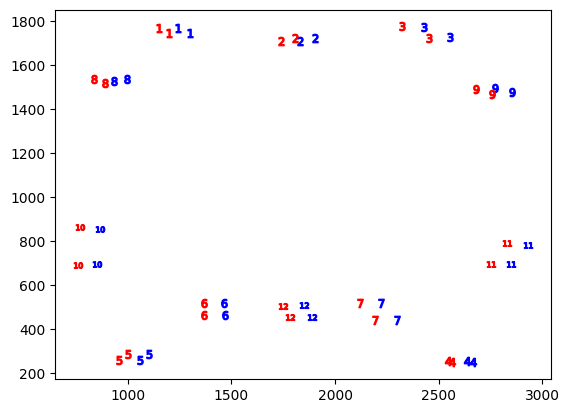

In [6]:
# Initialize object and get shapes

Landmarks.flip_dir = work_dir
data = Landmarks(xml_file)
lm_dict = data.lm_dict
optimal_order = []
pred_landmarks = []
real_landmarks = []
j = 0
for img, real_lm in lm_dict.items():
    pred_array = data.predict_shape(dat, img)  
    real_shape = np.array(real_lm)     
    pred_shape, optimal_order = reorganize_coor.order_shape(real_shape, pred_array, optimal_order)
    if j < 2:
        plot_shape(real_shape, pred_shape)
        j+=1
    pred_landmarks.append(pred_shape)
    real_landmarks.append(real_shape)
     

In [7]:
x_pred,y_pred = get_xy(pred_landmarks)
x_real,y_real = get_xy(real_landmarks)

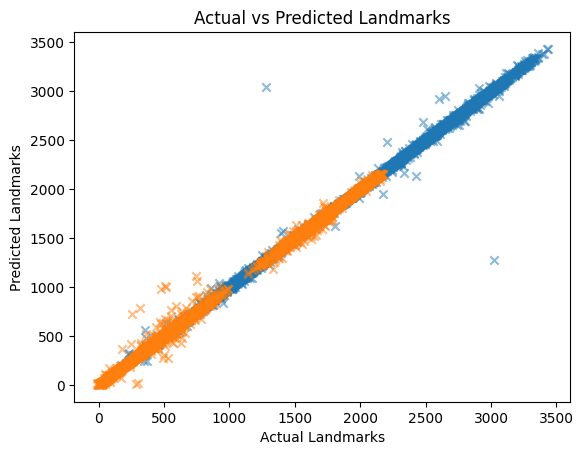

In [8]:
plt.scatter(x_pred, x_real, alpha = 0.5, marker ='x')
plt.scatter(y_pred, y_real, alpha = 0.5, marker='x')
plt.xlabel('Actual Landmarks')
plt.ylabel('Predicted Landmarks')
plt.title('Actual vs Predicted Landmarks')
plt.show()

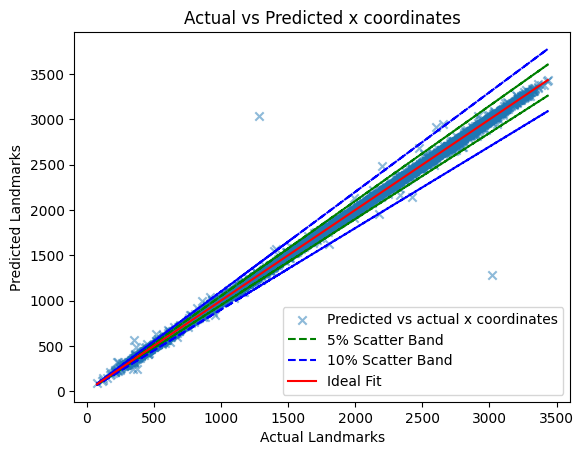

In [9]:

# Define the percentage for scatter bands
percent_5 = 0.05
percent_10 = 0.10

x_pred = np.array(x_pred)

# Calculate the scatter bands
upper_5 = x_pred * (1 + percent_5)
lower_5 = x_pred * (1 - percent_5)

upper_10 = x_pred * (1 + percent_10)
lower_10 = x_pred * (1 - percent_10)

# Plotting the actual vs predicted
plt.scatter(x_pred, x_real, alpha = 0.5, marker='x', label="Predicted vs actual x coordinates")

# Plotting the scatter bands
plt.plot(x_pred, upper_5, 'g--', label='5% Scatter Band')
plt.plot(x_pred, lower_5, 'g--')
plt.plot(x_pred, upper_10, 'b--', label='10% Scatter Band')
plt.plot(x_pred, lower_10, 'b--')

# Plotting the line y = x for reference
plt.plot([x_pred.min(), x_pred.max()], [x_pred.min(), x_pred.max()], 'r-', label='Ideal Fit')


# Adding labels and legend
plt.xlabel('Actual Landmarks')
plt.ylabel('Predicted Landmarks')
plt.title('Actual vs Predicted x coordinates')
plt.legend()
plt.show()

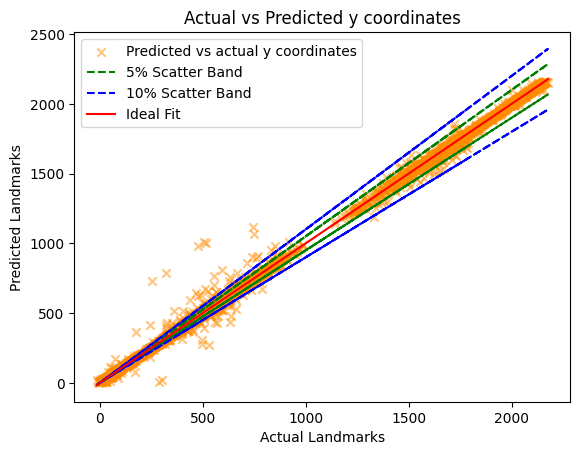

In [10]:

y_pred = np.array(y_pred)


# Define the percentage for scatter bands
percent_5 = 0.05
percent_10 = 0.10

# Calculate the scatter bands
upper_5 = y_pred * (1 + percent_5)
lower_5 = y_pred * (1 - percent_5)

upper_10 = y_pred * (1 + percent_10)
lower_10 = y_pred * (1 - percent_10)

# Plotting the actual vs predicted
plt.scatter(y_pred, y_real, alpha = 0.5, marker='x', color='darkorange', label="Predicted vs actual y coordinates")

# Plotting the scatter bands
plt.plot(y_pred, upper_5, 'g--', label='5% Scatter Band')
plt.plot(y_pred, lower_5, 'g--')
plt.plot(y_pred, upper_10, 'b--', label='10% Scatter Band')
plt.plot(y_pred, lower_10, 'b--')

# Plotting the line y = x for reference
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'r-', label='Ideal Fit')

# Adding labels and legend
plt.xlabel('Actual Landmarks')
plt.ylabel('Predicted Landmarks')
plt.title('Actual vs Predicted y coordinates')
plt.legend()

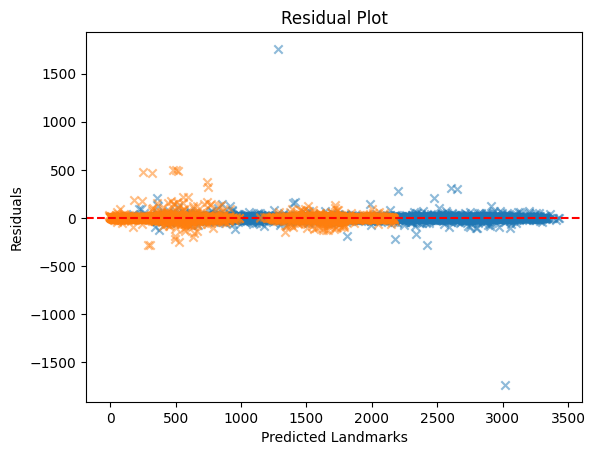

In [11]:
x_residuals = np.array(x_real) - np.array(x_pred)
y_residuals = np.array(y_real) - np.array(y_pred)
plt.scatter(x_pred, x_residuals, alpha = 0.5, marker ='x')
plt.scatter(y_pred, y_residuals, alpha = 0.5, marker ='x')
plt.xlabel('Predicted Landmarks')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [12]:

mae, mre = data.calculate_error(dat) 

all_data.xml MRE of the model: carabus.dat is 0.010447196467181159
all_data.xml MAE of the model: carabus.dat is 17.740139142050136


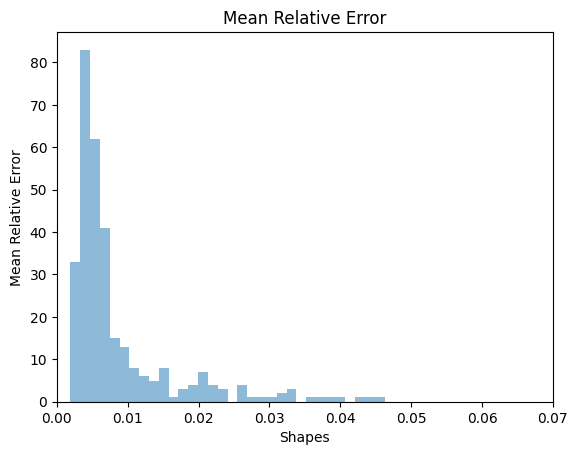

In [29]:
plt.hist(list(mre), alpha = 0.5, bins=150)
plt.xlabel('Shapes')
plt.ylabel('Mean Relative Error')
plt.title('Mean Relative Error')
plt.xlim(-0, 0.07)
# plt.axhline(y=0, color='r', linestyle='--')
plt.show()